In [ ]:
#importing libraries and datasets

import tensorflow as ts #build, train and deploy models at scale
import pandas as pd  #excel in python
import numpy as np #used for numerical analysis

#libraries for data visualisation
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme = "monokai", context = "notebook", ticks = True, grid = "False")

#setting the style of the notebook to be monokai theme
#this line of code is important to ensure that we are able to see x and y axes clearly


2025-04-07 04:07:38.768958: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [ ]:
#read our data using pandas

diabetes = pd.read_csv('diabetes.csv')

In [ ]:
diabetes.head(7) # first seven column of data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1


In [4]:
diabetes.tail() # last five rows data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diabetes.describe() 

#mean = average, std = standard deviation, min and max
#Average BMI = 31.99 approx
#Average Age = 33
#Min Age = 21, Max Age = 81

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
diabetes


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot: xlabel='Outcome', ylabel='count'>

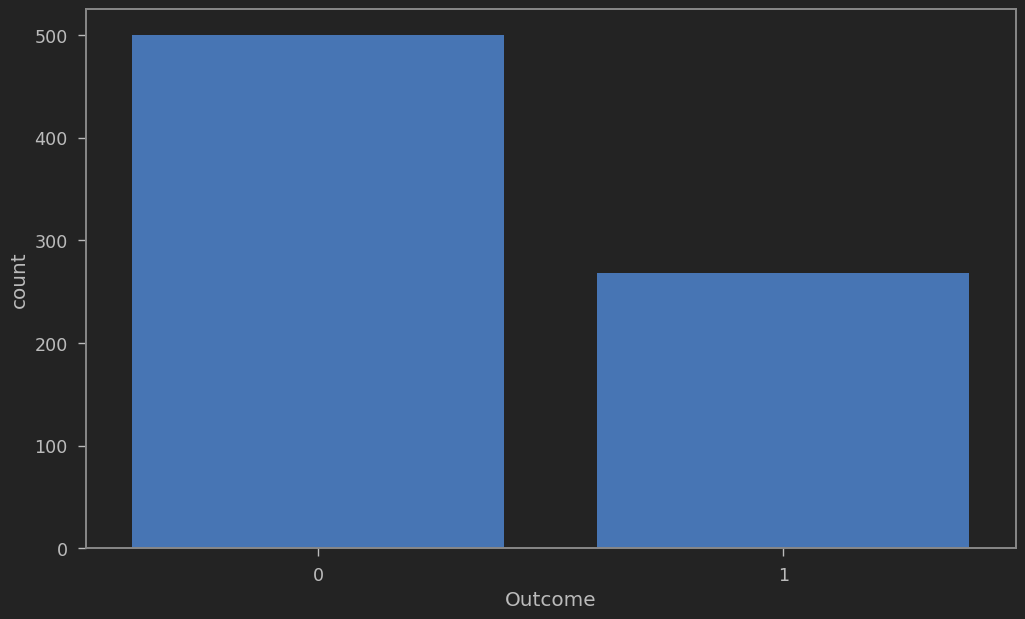

In [8]:
# performing data visualisation: How many patients actually have diabetes and how many dont have diabetes

plt.figure(figsize = (12, 7))
sns.countplot(x = 'Outcome', data = diabetes)

#people belong to class 0 are healthy
#people belong to class 1 having diabetes

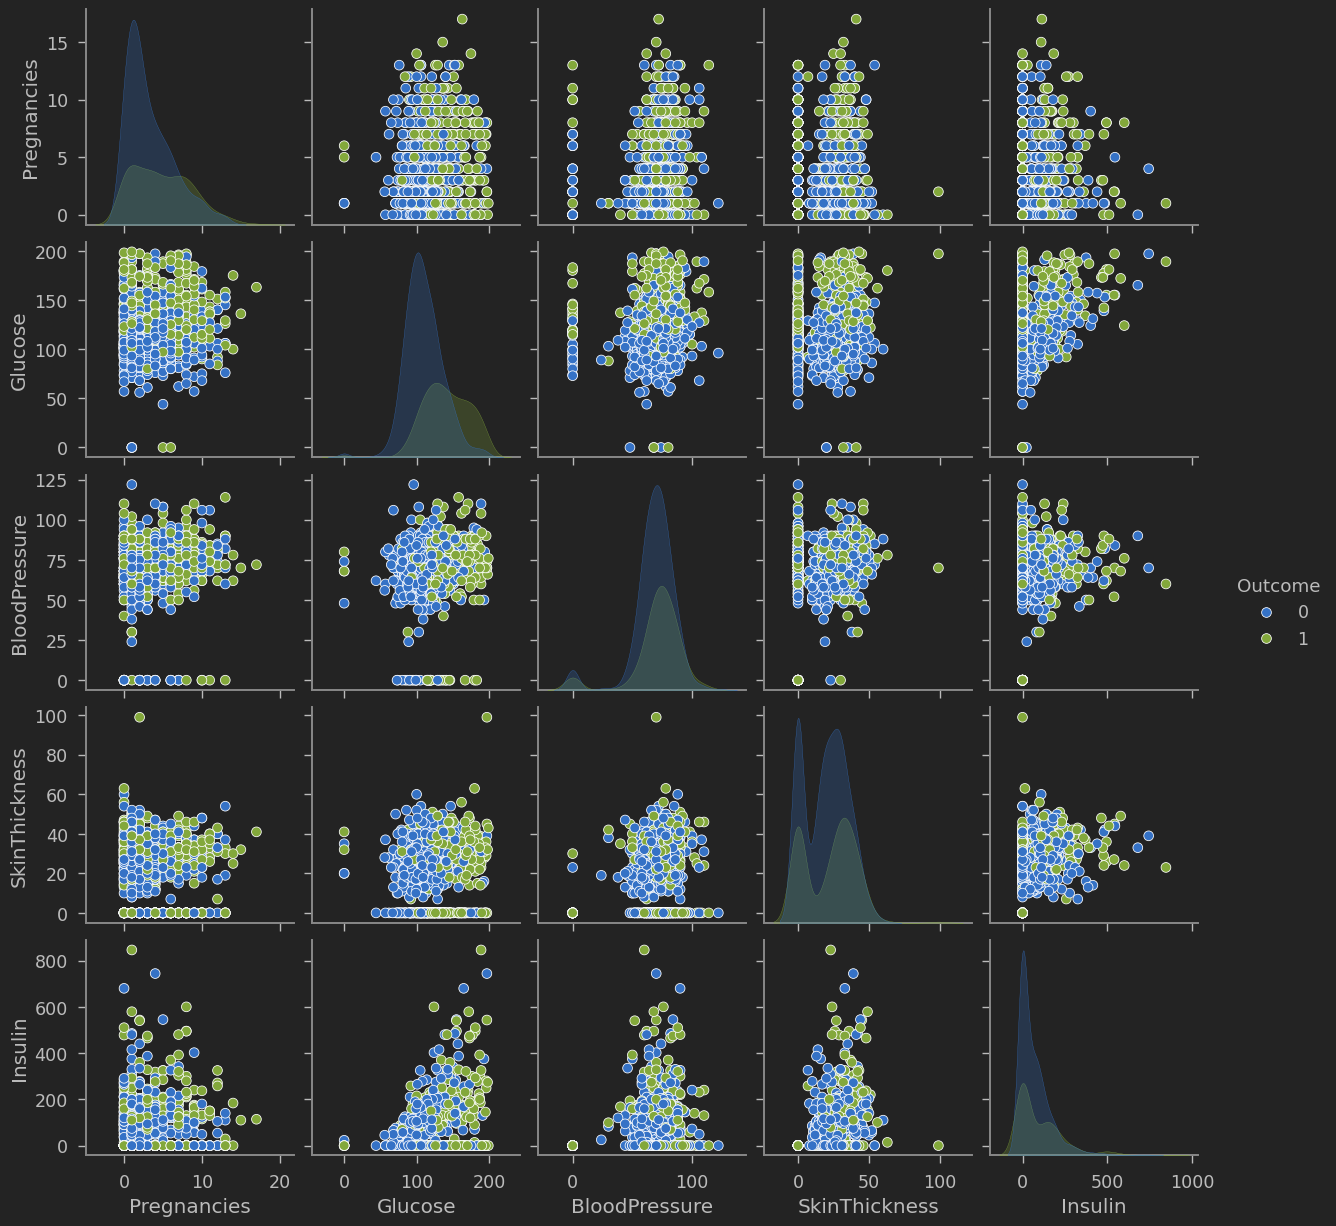

In [9]:
sns.pairplot(diabetes, hue = 'Outcome', vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin'])

In [10]:
#Splitting the data and preparing it for training
x = diabetes.iloc[:, 0:8].values #starting from row index 0, not including index 8


In [11]:
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
y = diabetes.iloc[:, 8].values #column of index 8

In [13]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [14]:
# Feature scaling is a must in ANN

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

In [15]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [16]:
# splitting data into training set and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)


In [17]:
x_train.shape

(614, 8)

In [18]:
x_test.shape

(154, 8)

In [19]:
# - Change the split ratio to 25% for testing and 75% for training
# - Ensure that the split was successful

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)
x_train.shape


(576, 8)

In [20]:
x_test.shape

(192, 8)

In [32]:
# Building a Neural Network Model in Keras

import tensorflow as tf

ANN_model = tf.keras.models.Sequential()
ANN_model.add(tf.keras.layers.Dense(units = 400, activation = 'relu', input_shape = (8, )))
ANN_model.add(tf.keras.layers.Dropout(0.2))


ANN_model.add(tf.keras.layers.Dense(units = 400, activation = 'relu'))
ANN_model.add(tf.keras.layers.Dropout(0.2))

ANN_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))




In [33]:
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 400)               3600      
                                                                 
 dropout_2 (Dropout)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 400)               160400    
                                                                 
 dropout_3 (Dropout)         (None, 400)               0         
                                                                 
 dense_5 (Dense)             (None, 1)                 401       
                                                                 
Total params: 164,401
Trainable params: 164,401
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile and train the ANN model

ANN_model.compile(optimizer = 'Adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [35]:
epochs_hist = ANN_model.fit(x_train, y_train, epochs = 200)

Epoch 1/200
18/18 [==============================] - 0s 2ms/step - loss: 0.5500 - accuracy: 0.7552
Epoch 2/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4533 - accuracy: 0.7795
Epoch 3/200
18/18 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.7986
Epoch 4/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4281 - accuracy: 0.8021
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4177 - accuracy: 0.8090
Epoch 6/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4113 - accuracy: 0.8194
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.4148 - accuracy: 0.7934
Epoch 8/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3954 - accuracy: 0.8108
Epoch 9/200
18/18 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0.8212
Epoch 10/200
18/18 [==============================] - 0s 5ms/step - loss: 0.3876 - accuracy: 0.8212
Epoch 11/

In [25]:
y_pred = ANN_model.predict(x_test)

6/6 [==============================] - 0s 1ms/step


In [26]:
y_pred

array([[9.98259544e-01],
       [1.00000000e+00],
       [9.99999642e-01],
       [9.91995275e-01],
       [1.00000000e+00],
       [3.05141211e-01],
       [3.57630625e-02],
       [1.10312348e-09],
       [1.00000000e+00],
       [4.06729348e-04],
       [9.99924183e-01],
       [9.95897710e-01],
       [2.60777865e-03],
       [9.99951959e-01],
       [5.65746495e-06],
       [6.22338383e-03],
       [4.99368012e-01],
       [8.90329421e-01],
       [6.81503851e-04],
       [9.73787792e-07],
       [1.45051457e-10],
       [1.13572021e-13],
       [2.19256163e-01],
       [4.97653033e-04],
       [8.35986733e-01],
       [5.80817584e-07],
       [6.28581794e-04],
       [3.87181062e-03],
       [3.80401197e-03],
       [3.06763232e-01],
       [3.91188405e-06],
       [2.27941824e-13],
       [9.99816775e-01],
       [9.89293694e-01],
       [8.34085004e-05],
       [1.87050435e-03],
       [5.20422077e-03],
       [9.99917805e-01],
       [7.84614205e-01],
       [9.94569182e-01],


In [36]:
y_pred = (y_pred > 0.5)

In [28]:
y_pred

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [

In [37]:
#Evaluating Trained Model Performance

epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

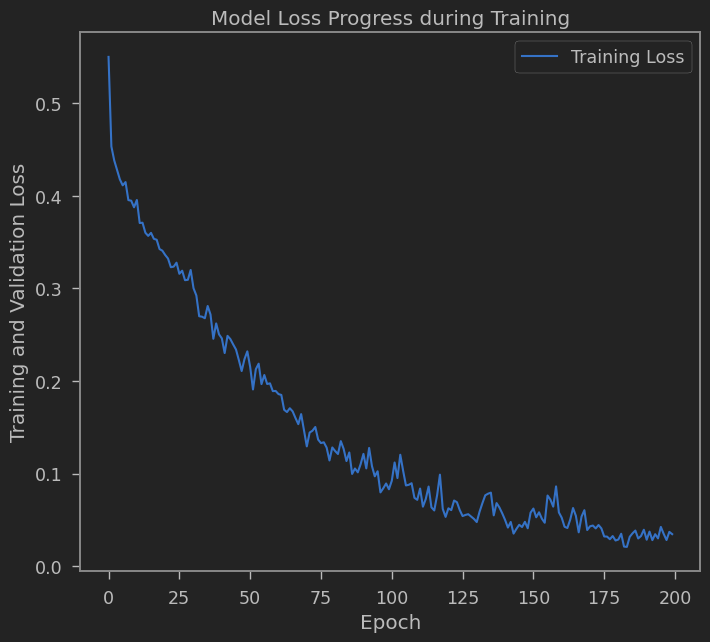

In [38]:
plt.plot(epochs_hist.history['loss'])
plt.title('Model Loss Progress during Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss'])

In [39]:
#training set performance

from sklearn.metrics import confusion_matrix

#testing set performance

cm = confusion_matrix(y_test, y_pred)


<AxesSubplot: >

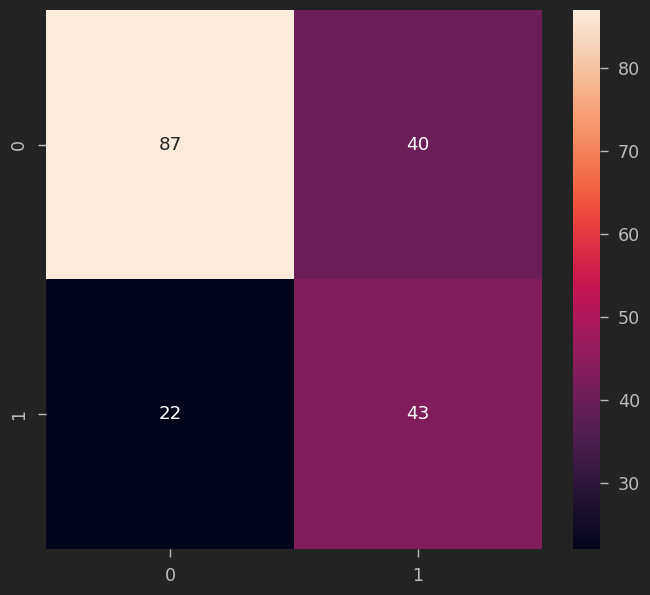

In [40]:
sns.heatmap(cm, annot = True)

In [41]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       127
           1       0.52      0.66      0.58        65

    accuracy                           0.68       192
   macro avg       0.66      0.67      0.66       192
weighted avg       0.70      0.68      0.68       192



In [42]:
#Training and Evaluating an XG Boost Algorithm
!pip install xgboost




[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [43]:
import xgboost as xgb
XGB_model = xgb.XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 10)
XGB_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [44]:
result_train = XGB_model.score(x_train, y_train)
print("Accuracy: {}".format(result_train))

Accuracy: 0.8611111111111112


In [45]:
# predict the score of trained data using the testing dataset

result_test = XGB_model.score(x_test, y_test)
print("Accuracy: {}".format(result_test))


Accuracy: 0.7447916666666666


In [46]:
# make prediction on the test data
y_predict = XGB_model.predict(x_test)

Text(0.5, 35.38888888888887, 'Actual Class')

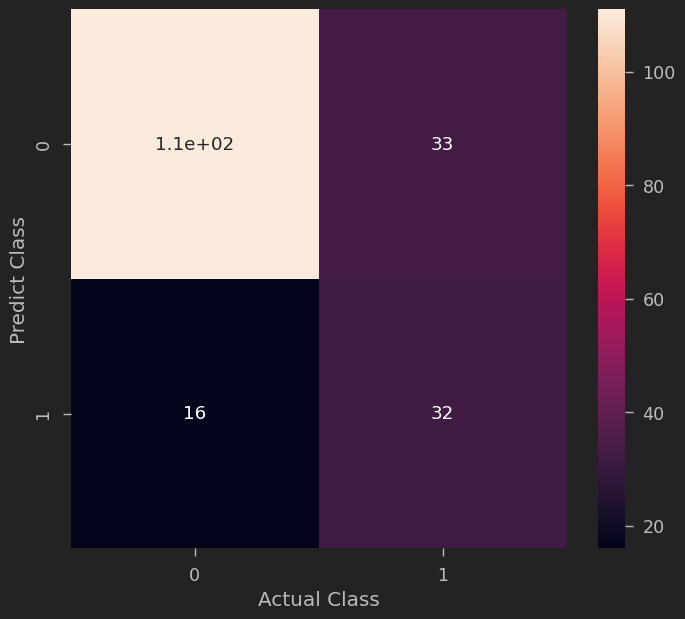

In [47]:

cm = confusion_matrix(y_predict, y_test)
sns.heatmap(cm, annot = True)
plt.ylabel("Predict Class")
plt.xlabel("Actual Class")